In [1]:
import numpy as np
import pandas as pd

In [3]:
trans = pd.DataFrame({"A":[12,4,5,None,1],"B":[7,2,54,3,None],"C":[20,16,11,3,8],
                      "D":[14,3,None,2,6],"E":[14,3,None,2,6]},index=['Row_1','Row_2','Row_3','Row_4','Row_5'])
trans

,A,B,C,D,E
Row_1,12.0,7.0,20,14.0,14.0
Row_2,4.0,2.0,16,3.0,3.0
Row_3,5.0,54.0,11,NaN,NaN
Row_4,NaN,3.0,3,2.0,2.0
Row_5,1.0,NaN,8,6.0,6.0


In [5]:
result = trans.transform(lambda x: x+10)
result

,A,B,C,D,E
Row_1,22.0,17.0,30,24.0,24.0
Row_2,14.0,12.0,26,13.0,13.0
Row_3,15.0,64.0,21,NaN,NaN
Row_4,NaN,13.0,13,12.0,12.0
Row_5,11.0,NaN,18,16.0,16.0


In [7]:
result2 = trans.transform([np.sqrt,np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                       E                
                exp      sqrt           exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02  2.449490  4.034288e+02

In [8]:
x = np.random.randint(10,200,size=10)
x

array([ 36, 101, 196,  97,  34,  82, 179,  32,  54, 167])

In [9]:
np.digitize(x,bins=[50])

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [10]:
np.digitize(x,bins=[50,100])

array([0, 2, 2, 1, 0, 1, 2, 0, 1, 2])

In [12]:
df = pd.DataFrame({"height":x})
df

,height
0,36
1,101
2,196
3,97
4,34
5,82
6,179
7,32
8,54
9,167


In [13]:
df['binned'] = pd.cut(x=df['height'],bins=[0,25,50,100,200])
df

,height,binned
0,36,"(25, 50]"
1,101,"(100, 200]"
2,196,"(100, 200]"
3,97,"(50, 100]"
4,34,"(25, 50]"
5,82,"(50, 100]"
6,179,"(100, 200]"
7,32,"(25, 50]"
8,54,"(50, 100]"
9,167,"(100, 200]"


In [14]:
df['bin_label'] = pd.cut(x=df['height'],
                        bins = [0,25,50,100,200],
                        labels = [1,2,3,4])
df

,height,binned,bin_label
0,36,"(25, 50]",2
1,101,"(100, 200]",4
2,196,"(100, 200]",4
3,97,"(50, 100]",3
4,34,"(25, 50]",2
5,82,"(50, 100]",3
6,179,"(100, 200]",4
7,32,"(25, 50]",2
8,54,"(50, 100]",3
9,167,"(100, 200]",4


In [15]:
pd.qcut(df['height'],q=5)

0      (35.6, 70.8]
1     (98.6, 169.4]
2    (169.4, 196.0]
3      (70.8, 98.6]
4    (31.999, 35.6]
5      (70.8, 98.6]
6    (169.4, 196.0]
7    (31.999, 35.6]
8      (35.6, 70.8]
9     (98.6, 169.4]
Name: height, dtype: category
Categories (5, interval[float64]): [(31.999, 35.6] < (35.6, 70.8] < (70.8, 98.6] < (98.6, 169.4] < (169.4, 196.0]]

In [16]:
degrees = ["none","cum laude","magna cum laude","summa cum laude"]
student_results = [3.93,3.24,2.80,2.83,3.91,3.698,3.731,3.25,3.24,3.82,3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0,3.6,3.8,3.9,4.0], labels=degrees)
honor = pd.DataFrame({'grades':student_results,'honors':student_results_degrees})
honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


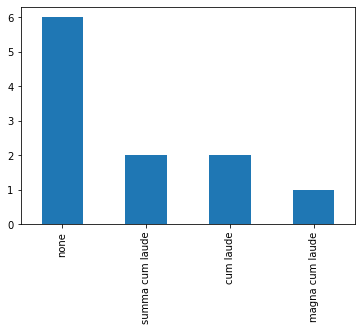

In [17]:
pd.value_counts(student_results_degrees).plot.bar()